Выводы:

1. digit:
Лучшим классификатором можно считать LogisticRegression (f1 = 0.97). Также хороши VotingClassifier и RandomForeast (f1 > 0.96). Стоит отметить, что некоторые алгоритмы не смогли набрать и f1 = 0.85. К ним относятся AdaBoostClassifier -- 0.734, NaiveBayes -- 0.819, DecisionTreeClassifier -- 0.85.

2. breast_cancer:
Лучший результат показал AdaBoostClassifier (f1 = 0.97). Также можно выделить VotingClassifier, RandomForeast и SVM (f1 = 0.95). При этом SVM исполняется значительно дольше других (около минуты).

3. wine:
Достаточно простой для анализа набор, Многие классификаторы исполняют работу моментально при итоговой f1 = 1. Среди них VotingClassifier, RandomForest, SVM, NaiveBase

# DataSets

In [87]:
# подгружаем датасеты из библиотеки Scikit Learn
from sklearn import *
# подгружаем разные модули из библиотеки SciPy для выполнения расчётов
from scipy.io import arff
import pandas
import numpy
import itertools
from sklearn import model_selection as ms
#некоторые классификаторы генерируют чересчур много ошибок
import warnings
warnings.filterwarnings('ignore')

## 1.digits

In [88]:
dataset = datasets.load_digits()
dataFrame = pandas.DataFrame(dataset.data)
dataFrame['target'] = dataset.target
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [89]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data)))

1797 instances


###### preparation

In [90]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data))) 

1797 instances


In [91]:
train_data, test_data, train_labels, test_labels =  model_selection.train_test_split(data, target, test_size = 0.2)

# Baseline 

F1 = 0.019
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.00      0.00      0.00       182
           2       0.00      0.00      0.00       177
           3       0.10      1.00      0.18       183
           4       0.00      0.00      0.00       181
           5       0.00      0.00      0.00       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.00      0.00      0.00       174
           9       0.00      0.00      0.00       180

    accuracy                           0.10      1797
   macro avg       0.01      0.10      0.02      1797
weighted avg       0.01      0.10      0.02      1797



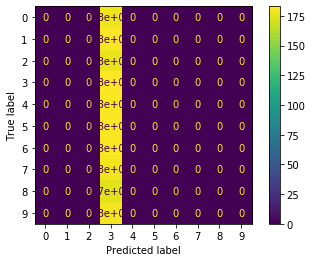

In [92]:
from sklearn import dummy, metrics

baseline = dummy.DummyClassifier(strategy='most_frequent')

baseline.fit (data, target)

base_predictions = baseline.predict(data)

f1 = metrics.f1_score(target, base_predictions, average='weighted')

print ("F1 = {:.3f}".format(f1))

print(metrics.classification_report(target, base_predictions))

metrics.plot_confusion_matrix(baseline, data, target)

# Классификаторы

## LogisticRegression 

Best hyper-parameters for accuracy: {'C': 1, 'penalty': 'l2', 'tol': 0.001}
F1: 0.986
Accuracy: 0.986
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        33
           5       1.00      0.95      0.97        41
           6       1.00      1.00      1.00        32
           7       1.00      0.97      0.99        40
           8       0.97      0.97      0.97        31
           9       0.93      0.96      0.95        28

    accuracy                           0.99       360
   macro avg       0.98      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



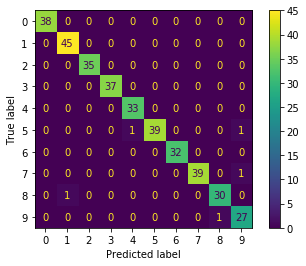

In [93]:
from sklearn import linear_model

folds = 2

hyper_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'], #штрафы
                'tol': [1e-3, 1e-4], #толерантность
                'C': [1, 10, 100, 1000] #обратная сила регуляризации
                   }

grid = ms.GridSearchCV(linear_model.LogisticRegression(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

## SVM 

Best hyper-parameters for accuracy: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
F1: 0.989
Accuracy: 0.989
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        33
           5       1.00      0.98      0.99        41
           6       1.00      1.00      1.00        32
           7       0.98      1.00      0.99        40
           8       0.97      0.97      0.97        31
           9       0.96      0.93      0.95        28

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



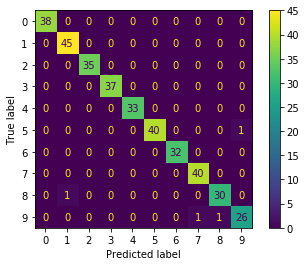

In [94]:
folds = 2

hyper_params_svc = {'kernel': ['linear','poly','rbf'], #kernal function
                    'gamma': [1e-3, 1e-4], #величина влияния отдельного обучающего примера
                    'C': [1, 10, 100, 1000]
                   }

svm_grid = ms.GridSearchCV(svm.SVC(), 
                           hyper_params_svc,  # parameters to tune via cross validation
                           refit=True,        # fit using all available data at the end, on the best found param combination
                           scoring=metrics.make_scorer(metrics.f1_score, average='weighted'), 
                           cv=ms.StratifiedKFold(n_splits=folds)
)

svm_grid_best_model = svm_grid.fit(train_data, train_labels)
predictions_svm = svm_grid_best_model.predict(test_data)
svm_grid_best_model_f1 = metrics.f1_score(test_labels, 
                      predictions_svm, 
                      average='weighted')
svm_grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions_svm)

print("Best hyper-parameters for accuracy: {}".format(svm_grid_best_model.best_params_))
print ("F1: {:.3f}".format(svm_grid_best_model_f1))
print ("Accuracy: {:.3f}".format(svm_grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions_svm))

metrics.plot_confusion_matrix(svm_grid_best_model, test_data, test_labels)

# DecisionTreeClassifier

Best hyper-parameters for accuracy: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'presort': False}
F1: 0.867
Accuracy: 0.867
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.80      0.82      0.81        45
           2       0.82      0.77      0.79        35
           3       0.84      0.86      0.85        37
           4       0.84      0.97      0.90        33
           5       0.88      0.93      0.90        41
           6       0.97      0.91      0.94        32
           7       0.91      0.80      0.85        40
           8       0.84      0.87      0.86        31
           9       0.76      0.79      0.77        28

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



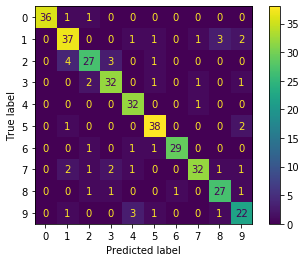

In [95]:
from sklearn import tree

#не больше 85%
folds = 20

hyper_params = {'presort':[True, False], #предварительная сортировка
                'max_depth' : [ 2, 3, 5, 7, 10], #максимальная глубина дерева
                'max_features' : ['auto', 1, 2, 3, None], #число функций, которые стоит учитывать при внутреннем разделении
                'min_samples_leaf' : [1, 2, 3, 4, 5]} #минимальное число выборок необходимое для внутреннего разделеня

grid = ms.GridSearchCV(tree.DecisionTreeClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# NaiveBayes

F1: 0.856
Accuracy: 0.853
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.83      0.76      0.79        45
           2       1.00      0.66      0.79        35
           3       0.97      0.89      0.93        37
           4       0.93      0.85      0.89        33
           5       0.95      0.88      0.91        41
           6       0.97      1.00      0.98        32
           7       0.71      0.93      0.80        40
           8       0.57      0.84      0.68        31
           9       0.80      0.71      0.75        28

    accuracy                           0.85       360
   macro avg       0.87      0.85      0.85       360
weighted avg       0.88      0.85      0.86       360



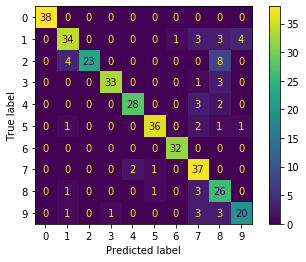

In [96]:
from sklearn import naive_bayes

#не больше 82%
folds = 2

hyper_params = {}

grid = ms.GridSearchCV(naive_bayes.GaussianNB(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# RandomForestClassifier

Best hyper-parameters for accuracy: {'max_depth': None, 'n_estimators': 100}
F1: 0.981
Accuracy: 0.981
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      1.00      0.99        45
           2       1.00      0.97      0.99        35
           3       0.97      1.00      0.99        37
           4       0.94      1.00      0.97        33
           5       1.00      0.98      0.99        41
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       1.00      0.97      0.98        31
           9       0.93      0.93      0.93        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



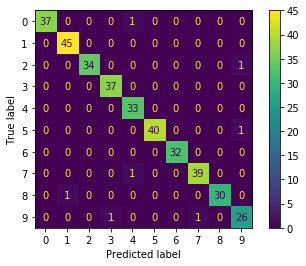

In [97]:
from sklearn import ensemble

folds = 8

hyper_params = {'max_depth' : [None, 8, 10, 13], #максимальная глубина
                'n_estimators' : [10, 50, 100, 250]} #количество решающих деревьев

grid = ms.GridSearchCV(ensemble.RandomForestClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# AdaBoostClassifier

Best hyper-parameters for accuracy: {'learning_rate': 0.1, 'n_estimators': 50}
F1: 0.805
Accuracy: 0.797
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        38
           1       0.79      0.60      0.68        45
           2       1.00      0.57      0.73        35
           3       0.85      0.92      0.88        37
           4       0.84      0.79      0.81        33
           5       0.92      0.85      0.89        41
           6       0.91      0.91      0.91        32
           7       0.95      0.90      0.92        40
           8       0.44      0.97      0.61        31
           9       0.71      0.79      0.75        28

    accuracy                           0.80       360
   macro avg       0.84      0.80      0.80       360
weighted avg       0.85      0.80      0.81       360



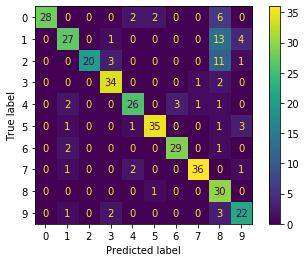

In [98]:
from sklearn import ensemble

folds = 10

hyper_params = {'n_estimators' : [50, 100], #максимальная глубина
                'learning_rate' : [1, 0.7, 0.5, 0.1]}  #скорость оубчения (число на которое умножается частная производная ошибки по каждому весу)

grid = ms.GridSearchCV(ensemble.AdaBoostClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# VotingClassifier

Best hyper-parameters for accuracy: {'flatten_transform': None, 'voting': 'hard'}
F1: 0.978
Accuracy: 0.978
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.96      1.00      0.98        45
           2       1.00      0.97      0.99        35
           3       1.00      1.00      1.00        37
           4       0.94      1.00      0.97        33
           5       0.97      0.95      0.96        41
           6       1.00      1.00      1.00        32
           7       0.97      0.97      0.97        40
           8       0.97      0.94      0.95        31
           9       0.96      0.93      0.95        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



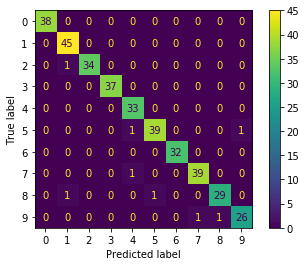

In [99]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


#долго исполняется
folds = 8

hyper_params = {'voting' : ['hard', 'soft'], #уточняющий параметр использования прогнозируемых меток 
                'flatten_transform' :[True, False, None]} #только при soft, влияет на форму вывода

grid = ms.GridSearchCV(ensemble.VotingClassifier(estimators=[ 
    #TypeError: __init__() missing 1 required positional argument: 'estimators'
    ('lr', LogisticRegression()), 
    ('rf', RandomForestClassifier()), 
    ('gnb', GaussianNB())]),  
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

## 2. breast_cancer

In [100]:
dataset = datasets.load_breast_cancer()
dataFrame = pandas.DataFrame(dataset.data)
dataFrame['target'] = dataset.target
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [101]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data)))

569 instances


###### preparation

In [102]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data))) 

569 instances


In [103]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size = 0.2)

# Baseline 

F1 = 0.484
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.63      1.00      0.77       357

    accuracy                           0.63       569
   macro avg       0.31      0.50      0.39       569
weighted avg       0.39      0.63      0.48       569



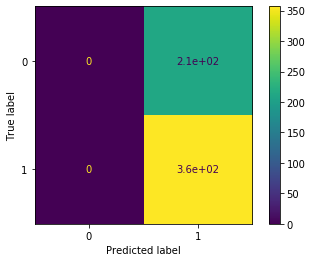

In [104]:
from sklearn import dummy, metrics

baseline = dummy.DummyClassifier(strategy='most_frequent')

baseline.fit (data, target)

base_predictions = baseline.predict(data)

f1 = metrics.f1_score(target, base_predictions, average='weighted')

print ("F1 = {:.3f}".format(f1))

print(metrics.classification_report(target, base_predictions))

metrics.plot_confusion_matrix(baseline, data, target)

# Классификаторы

## LogisticRegression 

Best hyper-parameters for accuracy: {'C': 1000, 'penalty': 'l2', 'tol': 0.001}
F1: 0.947
Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.93      0.98      0.95        63

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



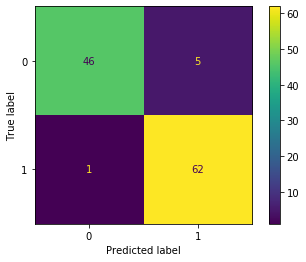

In [105]:
from sklearn import linear_model

folds = 3

hyper_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'tol': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]
                   }

grid = model_selection.GridSearchCV(linear_model.LogisticRegression(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=model_selection.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

#генерируется очень много ошибок
import warnings
warnings.filterwarnings('ignore')

## SVM 

Best hyper-parameters for accuracy: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
F1: 0.947
Accuracy: 0.947
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        51
           1       0.91      1.00      0.95        63

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



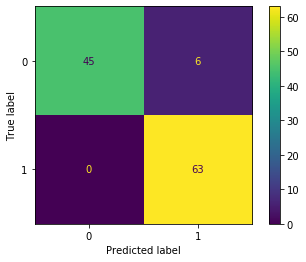

In [106]:
from sklearn import model_selection as ms

#очень долго исполняется (около минуты)
folds = 2

hyper_params_svc = {'kernel': ['linear','poly','rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]
                   }

svm_grid = ms.GridSearchCV(svm.SVC(), 
                           hyper_params_svc,  # parameters to tune via cross validation
                           refit=True,        # fit using all available data at the end, on the best found param combination
                           scoring=metrics.make_scorer(metrics.f1_score, average='weighted'), 
                           cv=ms.StratifiedKFold(n_splits=folds)
)

svm_grid_best_model = svm_grid.fit(train_data, train_labels)
predictions_svm = svm_grid_best_model.predict(test_data)
svm_grid_best_model_f1 = metrics.f1_score(test_labels, 
                      predictions_svm, 
                      average='weighted')
svm_grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions_svm)

print("Best hyper-parameters for accuracy: {}".format(svm_grid_best_model.best_params_))
print ("F1: {:.3f}".format(svm_grid_best_model_f1))
print ("Accuracy: {:.3f}".format(svm_grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions_svm))

metrics.plot_confusion_matrix(svm_grid_best_model, test_data, test_labels)

# DecisionTreeClassifier

Best hyper-parameters for accuracy: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'presort': True}
F1: 0.895
Accuracy: 0.895
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        51
           1       0.90      0.90      0.90        63

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



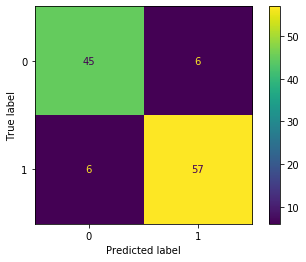

In [107]:
from sklearn import tree

#быстрый, классный
folds = 14

hyper_params = {'presort':[True, False], 
                'max_depth' : [ 2, 3, 5, 7, 10], 
                'max_features' : ['auto', 1, 2, 3, None],
                'min_samples_leaf' : [1, 2, 3, 4, 5]}

grid = ms.GridSearchCV(tree.DecisionTreeClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# NaiveBayes

F1: 0.947
Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.93      0.98      0.95        63

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



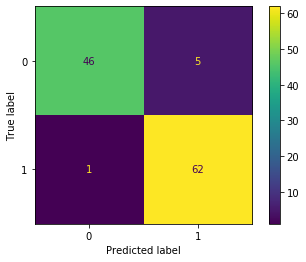

In [108]:
from sklearn import naive_bayes

folds = 35

hyper_params = {}

grid = ms.GridSearchCV(naive_bayes.GaussianNB(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# RandomForestClassifier

Best hyper-parameters for accuracy: {'max_depth': None, 'n_estimators': 100}
F1: 0.956
Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        51
           1       0.94      0.98      0.96        63

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



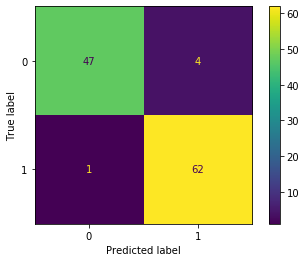

In [109]:
from sklearn import ensemble

folds = 8

hyper_params = {'max_depth' : [None, 8, 10, 13], #максимальная глубина
                'n_estimators' : [10, 50, 100, 250]}#количество решающих деревьев

grid = ms.GridSearchCV(ensemble.RandomForestClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# AdaBoostClassifier

Best hyper-parameters for accuracy: {'learning_rate': 1, 'n_estimators': 100}
F1: 0.947
Accuracy: 0.947
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        51
           1       0.93      0.98      0.95        63

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



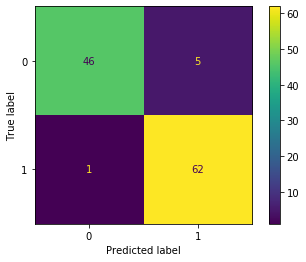

In [110]:
from sklearn import ensemble

folds = 12

hyper_params = {'n_estimators' : [50, 100], #максимальная глубина
                'learning_rate' : [1, 0.7, 0.5, 0.1]}  #скорость оубчения (число на которое умножается частная производная ошибки по каждому весу)

grid = ms.GridSearchCV(ensemble.AdaBoostClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# VotingClassifier

Best hyper-parameters for accuracy: {'flatten_transform': False, 'voting': 'hard'}
F1: 0.956
Accuracy: 0.956
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        51
           1       0.93      1.00      0.96        63

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



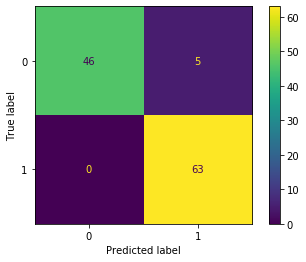

In [111]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

folds = 26

hyper_params = {'voting' : ['hard', 'soft'], 'flatten_transform' :[True, False, None]}

grid = ms.GridSearchCV(ensemble.VotingClassifier(estimators=[
    ('lr', LogisticRegression()), 
    ('rf', RandomForestClassifier()), 
    ('gnb', GaussianNB())]), #TypeError: __init__() missing 1 required positional argument: 'estimators' 
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

## 3. wine

In [112]:
dataset = datasets.load_wine()
dataFrame = pandas.DataFrame(dataset.data)
dataFrame['target'] = dataset.target
dataFrame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [113]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data)))

178 instances


###### preparation

In [114]:
target = dataFrame['target']
data = dataFrame.drop(columns = ['target'])
print('{} instances'.format(len(data))) 

178 instances


In [115]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target, test_size = 0.2)

# Baseline 

F1 = 0.227
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.40      1.00      0.57        71
           2       0.00      0.00      0.00        48

    accuracy                           0.40       178
   macro avg       0.13      0.33      0.19       178
weighted avg       0.16      0.40      0.23       178



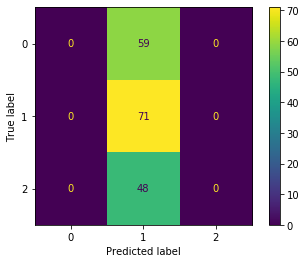

In [116]:
from sklearn import dummy, metrics

baseline = dummy.DummyClassifier(strategy='most_frequent')

baseline.fit (data, target)

base_predictions = baseline.predict(data)

f1 = metrics.f1_score(target, base_predictions, average='weighted')

print ("F1 = {:.3f}".format(f1))

print(metrics.classification_report(target, base_predictions))

metrics.plot_confusion_matrix(baseline, data, target)

# Классификаторы

## LogisticRegression 

Best hyper-parameters for accuracy: {'C': 1, 'penalty': 'l2', 'tol': 0.001}
F1: 0.944
Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



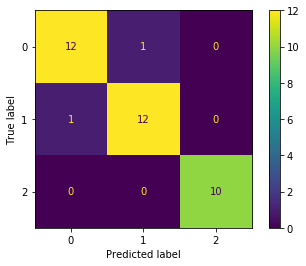

In [117]:
from sklearn import linear_model

folds = 9

hyper_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'tol': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]
                   }

grid = ms.GridSearchCV(linear_model.LogisticRegression(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

## SVM 

Best hyper-parameters for accuracy: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
F1: 0.972
Accuracy: 0.972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



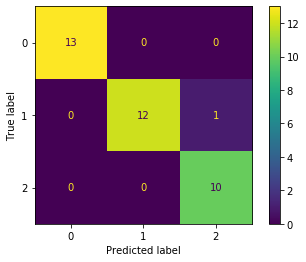

In [118]:
folds = 4

hyper_params_svc = {'kernel': ['linear','poly','rbf'],
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]
                   }

svm_grid = ms.GridSearchCV(svm.SVC(), 
                           hyper_params_svc,  # parameters to tune via cross validation
                           refit=True,        # fit using all available data at the end, on the best found param combination
                           scoring=metrics.make_scorer(metrics.f1_score, average='weighted'), 
                           cv=ms.StratifiedKFold(n_splits=folds)
)

svm_grid_best_model = svm_grid.fit(train_data, train_labels)
predictions_svm = svm_grid_best_model.predict(test_data)
svm_grid_best_model_f1 = metrics.f1_score(test_labels, 
                      predictions_svm, 
                      average='weighted')
svm_grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions_svm)

print("Best hyper-parameters for accuracy: {}".format(svm_grid_best_model.best_params_))
print ("F1: {:.3f}".format(svm_grid_best_model_f1))
print ("Accuracy: {:.3f}".format(svm_grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions_svm))

metrics.plot_confusion_matrix(svm_grid_best_model, test_data, test_labels)

# DecisionTreeClassifier

Best hyper-parameters for accuracy: {'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 1, 'presort': True}
F1: 0.766
Accuracy: 0.778
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.78      0.54      0.64        13
           2       0.77      1.00      0.87        10

    accuracy                           0.78        36
   macro avg       0.78      0.79      0.77        36
weighted avg       0.78      0.78      0.77        36



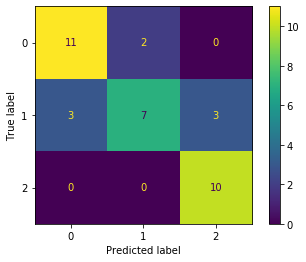

In [119]:
from sklearn import tree

#неоправданно долго для хорошей f1
folds = 50

hyper_params = {'presort':[True, False], 
                'max_depth' : [ 2, 3, 5, 7, 10], 
                'max_features' : ['auto', 1, 2, 3, None],
                'min_samples_leaf' : [1, 2, 3, 4, 5]}

grid = ms.GridSearchCV(tree.DecisionTreeClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# NaiveBayes

F1: 0.972
Accuracy: 0.972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



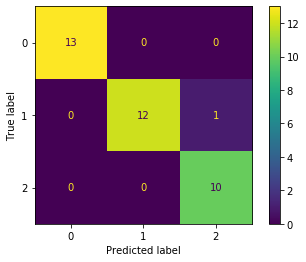

In [120]:
from sklearn import naive_bayes

folds = 2

hyper_params = {}

grid = ms.GridSearchCV(naive_bayes.GaussianNB(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# RandomForestClassifier

Best hyper-parameters for accuracy: {'max_depth': 8, 'n_estimators': 100}
F1: 1.000
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



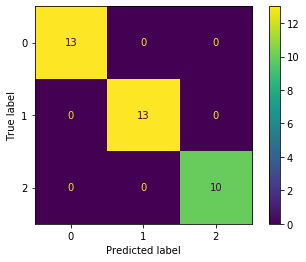

In [121]:
from sklearn import ensemble

folds = 2

hyper_params = {'max_depth' : [None, 8, 10, 13], #максимальная глубина
                'n_estimators' : [10, 50, 100, 250]}#количество решающих деревьев

grid = ms.GridSearchCV(ensemble.RandomForestClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# AdaBoostClassifier

Best hyper-parameters for accuracy: {'learning_rate': 0.7, 'n_estimators': 100}
F1: 0.972
Accuracy: 0.972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      1.00      0.96        13
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



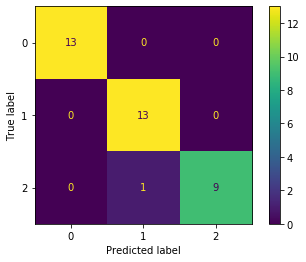

In [122]:
from sklearn import ensemble

folds = 2

hyper_params = {'n_estimators' : [50, 100], #максимальная глубина
                'learning_rate' : [1, 0.7, 0.5, 0.1]}  #скорость оубчения (число на которое умножается частная производная ошибки по каждому весу)

grid = ms.GridSearchCV(ensemble.AdaBoostClassifier(),
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)

# VotingClassifier

Best hyper-parameters for accuracy: {'flatten_transform': True, 'voting': 'soft'}
F1: 0.972
Accuracy: 0.972
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



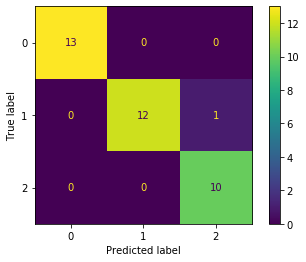

In [123]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

folds = 2

hyper_params = {'voting' : ['hard', 'soft'], 'flatten_transform' :[True, False, None]}

grid = ms.GridSearchCV(ensemble.VotingClassifier(estimators=[
    ('lr', LogisticRegression()), 
    ('rf', RandomForestClassifier()), 
    ('gnb', GaussianNB())]), #TypeError: __init__() missing 1 required positional argument: 'estimators' 
                       hyper_params,
                       refit=True,
                       scoring=metrics.make_scorer(metrics.f1_score, average='weighted'),
                       cv=ms.StratifiedKFold(n_splits=folds)
)

grid_best_model = grid.fit(train_data, train_labels)
predictions = grid_best_model.predict(test_data)
grid_best_model_f1 = metrics.f1_score(test_labels,
                                      predictions, 
                                      average='weighted')
grid_best_model_accuracy = metrics.accuracy_score(test_labels, predictions)

print("Best hyper-parameters for accuracy: {}".format(grid_best_model.best_params_))
print ("F1: {:.3f}".format(grid_best_model_f1))
print ("Accuracy: {:.3f}".format(grid_best_model_accuracy))
print (metrics.classification_report(test_labels, predictions))

metrics.plot_confusion_matrix(grid_best_model, test_data, test_labels)